# **Task 1: Prediction using Supervised Machine Learning**
# **Author: Hith Jain**


**Prediction using Supervised Machine Learning**

This is a simple linear regression task involving two variables namely, percentage of marks and number of hours studied. In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. Futhermore, we will find what will be the score if a student studies for 9.25 hours a day.

In [25]:
# Importing all libraries required to perform the task
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [26]:
# Reading data from remote link
url = "http://bit.ly/w-data"
test_data = pd.read_csv(url)
print("Data imported successfully")

test_data.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


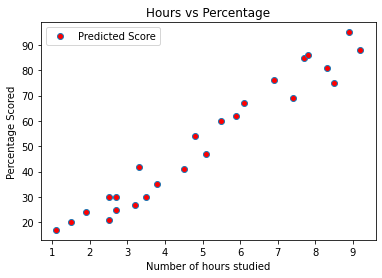

In [27]:
test_data.plot(x="Hours", y="Scores", style="o", markerfacecolor="red", label="Predicted Score")
plt.title('Hours vs Percentage')  
plt.xlabel('Number of hours studied')  
plt.ylabel('Percentage Scored')  
plt.show()

Seeing the current trend of the graph, we can conclude that there is a direct relation between number of hours studied and percentage obtained by a student. 

**Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [28]:
X = test_data.iloc[:, :-1].values  
y = test_data.iloc[:, 1].values 

To split the data into random training and testing datasets we will use sklearn module which has train_test_split() method.

In [29]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.35, random_state=0) 

# **Training the Model**
Now we train the model in order to achieve our desired outcomes.

In [30]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


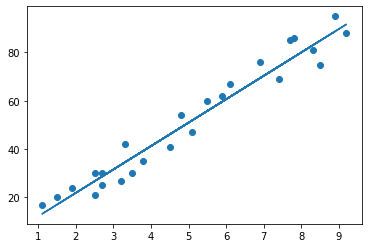

In [31]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# **Making predictions by Testing the model**


In [32]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]]


In [33]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


In [34]:
#Predicting scores if a student studies for 9.25 hrs per day
hours=9.25
own_pred=regressor.predict([[hours]])
print("No of Hours - {}".format(hours))
print("Predicted Score - {}".format(own_pred[0]))


No of Hours - 9.25
Predicted Score - 92.14523314523316


# **Evaluating the Model**
We perform this to find out how well different algorithms perform on a particular dataset.

In [35]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.691397441397446
